In [2]:
# Link data
# https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction/

In [3]:
# Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score

from plotly.subplots import make_subplots
import plotly.graph_objs as go

import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
os.listdir()

['.config', 'drive', 'sample_data']

In [5]:
df_app = pd.read_csv('drive/MyDrive/Learning_data/application_record.csv')
df_credit = pd.read_csv('drive/MyDrive/Learning_data/credit_record.csv')

In [6]:
df_app.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [7]:
df_credit.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [8]:
df_app = df_app.merge(df_credit, how='inner', on='ID')
df_app.shape

(777715, 20)

<h1 align='center'>TASK</h1><br>
<p>Build a machine learning model to predict if an applicant is 'good' or 'bad' client, different from other tasks, the definition of 'good' or 'bad' is not given. You should use some techique, such as vintage analysis to construct you label. Also, unbalance data problem is a big problem in this task.</p>

<h1>1. Handling Missing Data

In [9]:
# Check rows and columns data
print('All data')
print('Rows = {} and Columns = {}'.format(df_app.shape[0], df_app.shape[1]))
# Check missing value

print('Count of Missing value:\n')
print(df_app.isnull().sum())

All data
Rows = 777715 and Columns = 20
Count of Missing value:

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        240048
CNT_FAM_MEMBERS             0
MONTHS_BALANCE              0
STATUS                      0
dtype: int64


In [10]:
# Mengambil data hanya untuk missing value untuk di eksplore
df_miss_val = df_app[df_app['OCCUPATION_TYPE'].isnull() == True]

<h3>Bivariate Analysis<br>
<p>Finding correlation on every columns<br>

In [11]:
df_miss_val

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-4,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777597,5149729,M,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,-19101,-1721,1,0,0,0,NaN,2.0,-17,X
777598,5149729,M,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,-19101,-1721,1,0,0,0,NaN,2.0,-18,2
777599,5149729,M,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,-19101,-1721,1,0,0,0,NaN,2.0,-19,X
777600,5149729,M,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,-19101,-1721,1,0,0,0,NaN,2.0,-20,0


<ipython-input-12-11056612b686>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_miss_val.corr(), annot=True)


<Axes: >

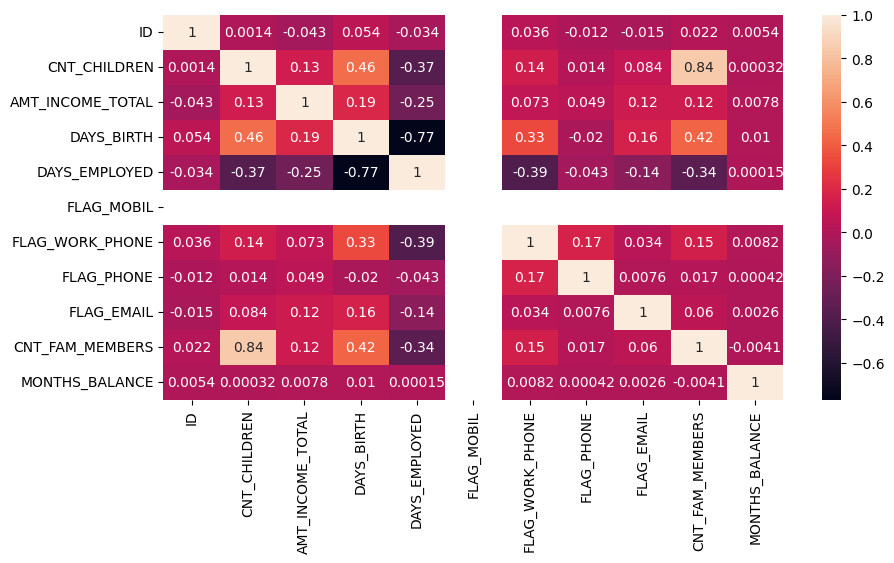

In [12]:
plt.figure(figsize=(10,5))
sns.heatmap(df_miss_val.corr(), annot=True)

Fill occupation_type who has missing value with unknown, just for a while<br>
unknown because occupation type of the customer is very unique and we can't find just by their amount total

In [13]:
df_app['OCCUPATION_TYPE'].fillna('Unknown', inplace=True)
df_app.dropna(inplace=True)
df_app.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
MONTHS_BALANCE         0
STATUS                 0
dtype: int64

<h1>2. EDA + Feature Engineering

In [14]:
print('How many unique id in application record?', len(set(df_app['ID'])))
print('How many unique id in credit record?', len(set(df_credit['ID'])))

How many unique id in application record? 36457
How many unique id in credit record? 45985


add new columns into df_app for y

In [15]:
# Analyze > 60 days past due
df_app['TARGET'] = np.where((df_app['STATUS'] == '2') |
                              (df_app['STATUS'] == '3') |
                               (df_app['STATUS'] == '4') |
                               (df_app['STATUS'] == '5'),1 ,0)

In [16]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   CODE_GENDER          777715 non-null  object 
 2   FLAG_OWN_CAR         777715 non-null  object 
 3   FLAG_OWN_REALTY      777715 non-null  object 
 4   CNT_CHILDREN         777715 non-null  int64  
 5   AMT_INCOME_TOTAL     777715 non-null  float64
 6   NAME_INCOME_TYPE     777715 non-null  object 
 7   NAME_EDUCATION_TYPE  777715 non-null  object 
 8   NAME_FAMILY_STATUS   777715 non-null  object 
 9   NAME_HOUSING_TYPE    777715 non-null  object 
 10  DAYS_BIRTH           777715 non-null  int64  
 11  DAYS_EMPLOYED        777715 non-null  int64  
 12  FLAG_MOBIL           777715 non-null  int64  
 13  FLAG_WORK_PHONE      777715 non-null  int64  
 14  FLAG_PHONE           777715 non-null  int64  
 15  FLAG_EMAIL       

<h3>Adding new columns have_children if cnt_children > 0

In [17]:
df_app.loc[df_app['CNT_CHILDREN'] > 0, 'HAVE_CHILDREN'] = 'Y'
df_app.loc[df_app['CNT_CHILDREN'] == 0, 'HAVE_CHILDREN'] = 'N'
df_app['HAVE_CHILDREN'].value_counts()

N    540639
Y    237076
Name: HAVE_CHILDREN, dtype: int64

<h3>Converting CNT_FAM_MEMBERS Columns into Integer

In [18]:
df_app['CNT_FAM_MEMBERS'] = df_app['CNT_FAM_MEMBERS'].astype(int)
df_app['CNT_FAM_MEMBERS'].info()

<class 'pandas.core.series.Series'>
Int64Index: 777715 entries, 0 to 777714
Series name: CNT_FAM_MEMBERS
Non-Null Count   Dtype
--------------   -----
777715 non-null  int64
dtypes: int64(1)
memory usage: 11.9 MB


Adding age columns from days_birth columns<br>
where - columns // 365 days<br>
because days_birth columns is Count backwards from current day (0), -1 means yesterday

In [19]:
df_app['AGE'] = (-df_app.DAYS_BIRTH)//365
df_app['AGE']

0         32
1         32
2         32
3         32
4         32
          ..
777710    25
777711    25
777712    25
777713    25
777714    25
Name: AGE, Length: 777715, dtype: int64

In [20]:
# replacing the value of C,X to numeric value
df_app['STATUS'].replace({'C': 6, 'X' : 7}, inplace=True)
df_app['STATUS']=df_app['STATUS'].astype(int)

df_app = df_app.drop(['DAYS_BIRTH','MONTHS_BALANCE','FLAG_WORK_PHONE','DAYS_EMPLOYED'],axis=1)
df_app

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS,TARGET,HAVE_CHILDREN,AGE
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,Unknown,2,6,0,N,32
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,Unknown,2,6,0,N,32
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,Unknown,2,6,0,N,32
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,Unknown,2,6,0,N,32
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,Unknown,2,6,0,N,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,1,0,0,Laborers,1,0,0,N,25
777711,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,1,0,0,Laborers,1,2,1,N,25
777712,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,1,0,0,Laborers,1,1,0,N,25
777713,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,1,0,0,Laborers,1,0,0,N,25


<h3>Change value<BR>
NAME_EDUCATION_TYPE, secondary / secondary special into secondary<BR>
NAME_FAMILY_STATUS, Single / not married into Single

In [21]:
df_app['NAME_EDUCATION_TYPE'].replace('Secondary / secondary special', 'Secondary', inplace=True)
df_app['NAME_FAMILY_STATUS'].replace('Single / not married', 'Single', inplace=True)

In [22]:
df_app['NAME_EDUCATION_TYPE'].value_counts()

Secondary            524261
Higher education     213633
Incomplete higher     30329
Lower secondary        8655
Academic degree         837
Name: NAME_EDUCATION_TYPE, dtype: int64

In [23]:
df_app.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'STATUS', 'TARGET',
       'HAVE_CHILDREN', 'AGE'],
      dtype='object')

In [24]:
df_app.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,777715.0,5.078743e+06,41804.424817,5008804.0,5044568.5,5069530.0,5115551.0,5150487.0
CNT_CHILDREN,777715.0,4.280823e-01,0.745755,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,777715.0,1.885348e+05,101622.450077,27000.0,121500.0,162000.0,225000.0,1575000.0
FLAG_MOBIL,777715.0,1.000000e+00,0.000000,1.0,1.0,1.0,1.0,1.0
FLAG_PHONE,777715.0,3.009650e-01,0.458678,0.0,0.0,0.0,1.0,1.0
FLAG_EMAIL,777715.0,9.167497e-02,0.288567,0.0,0.0,0.0,0.0,1.0
CNT_FAM_MEMBERS,777715.0,2.208837e+00,0.907380,1.0,2.0,2.0,3.0,20.0
STATUS,777715.0,3.881324e+00,3.075245,0.0,0.0,6.0,6.0,7.0
TARGET,777715.0,3.636294e-03,0.060192,0.0,0.0,0.0,0.0,1.0
AGE,777715.0,4.367133e+01,11.247138,20.0,34.0,43.0,53.0,68.0


<ipython-input-25-d71fc37979ac>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_app.corr(), annot=True)


<Axes: >

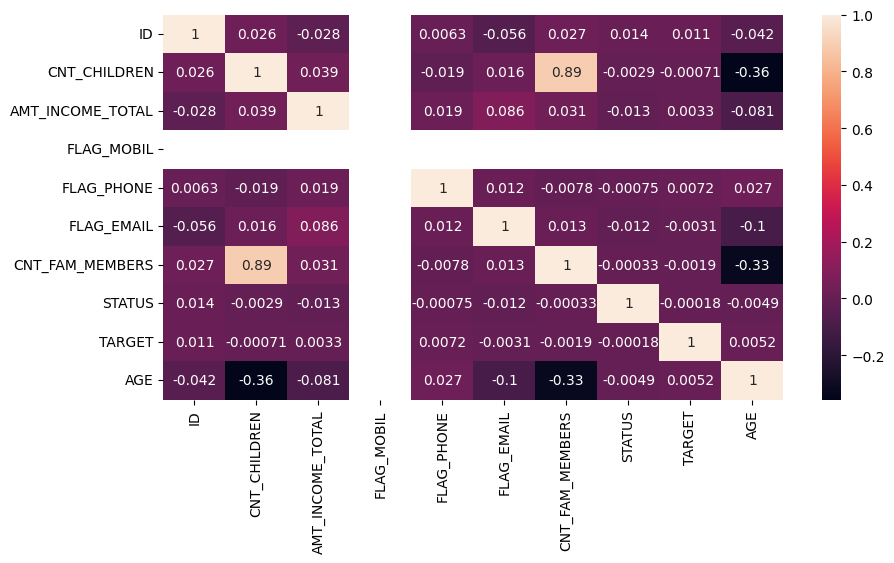

In [25]:
plt.figure(figsize=(10,5))
sns.heatmap(df_app.corr(), annot=True)

array([[<Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'CNT_CHILDREN'}>,
        <Axes: title={'center': 'AMT_INCOME_TOTAL'}>],
       [<Axes: title={'center': 'FLAG_MOBIL'}>,
        <Axes: title={'center': 'FLAG_PHONE'}>,
        <Axes: title={'center': 'FLAG_EMAIL'}>],
       [<Axes: title={'center': 'CNT_FAM_MEMBERS'}>,
        <Axes: title={'center': 'STATUS'}>,
        <Axes: title={'center': 'TARGET'}>],
       [<Axes: title={'center': 'AGE'}>, <Axes: >, <Axes: >]],
      dtype=object)

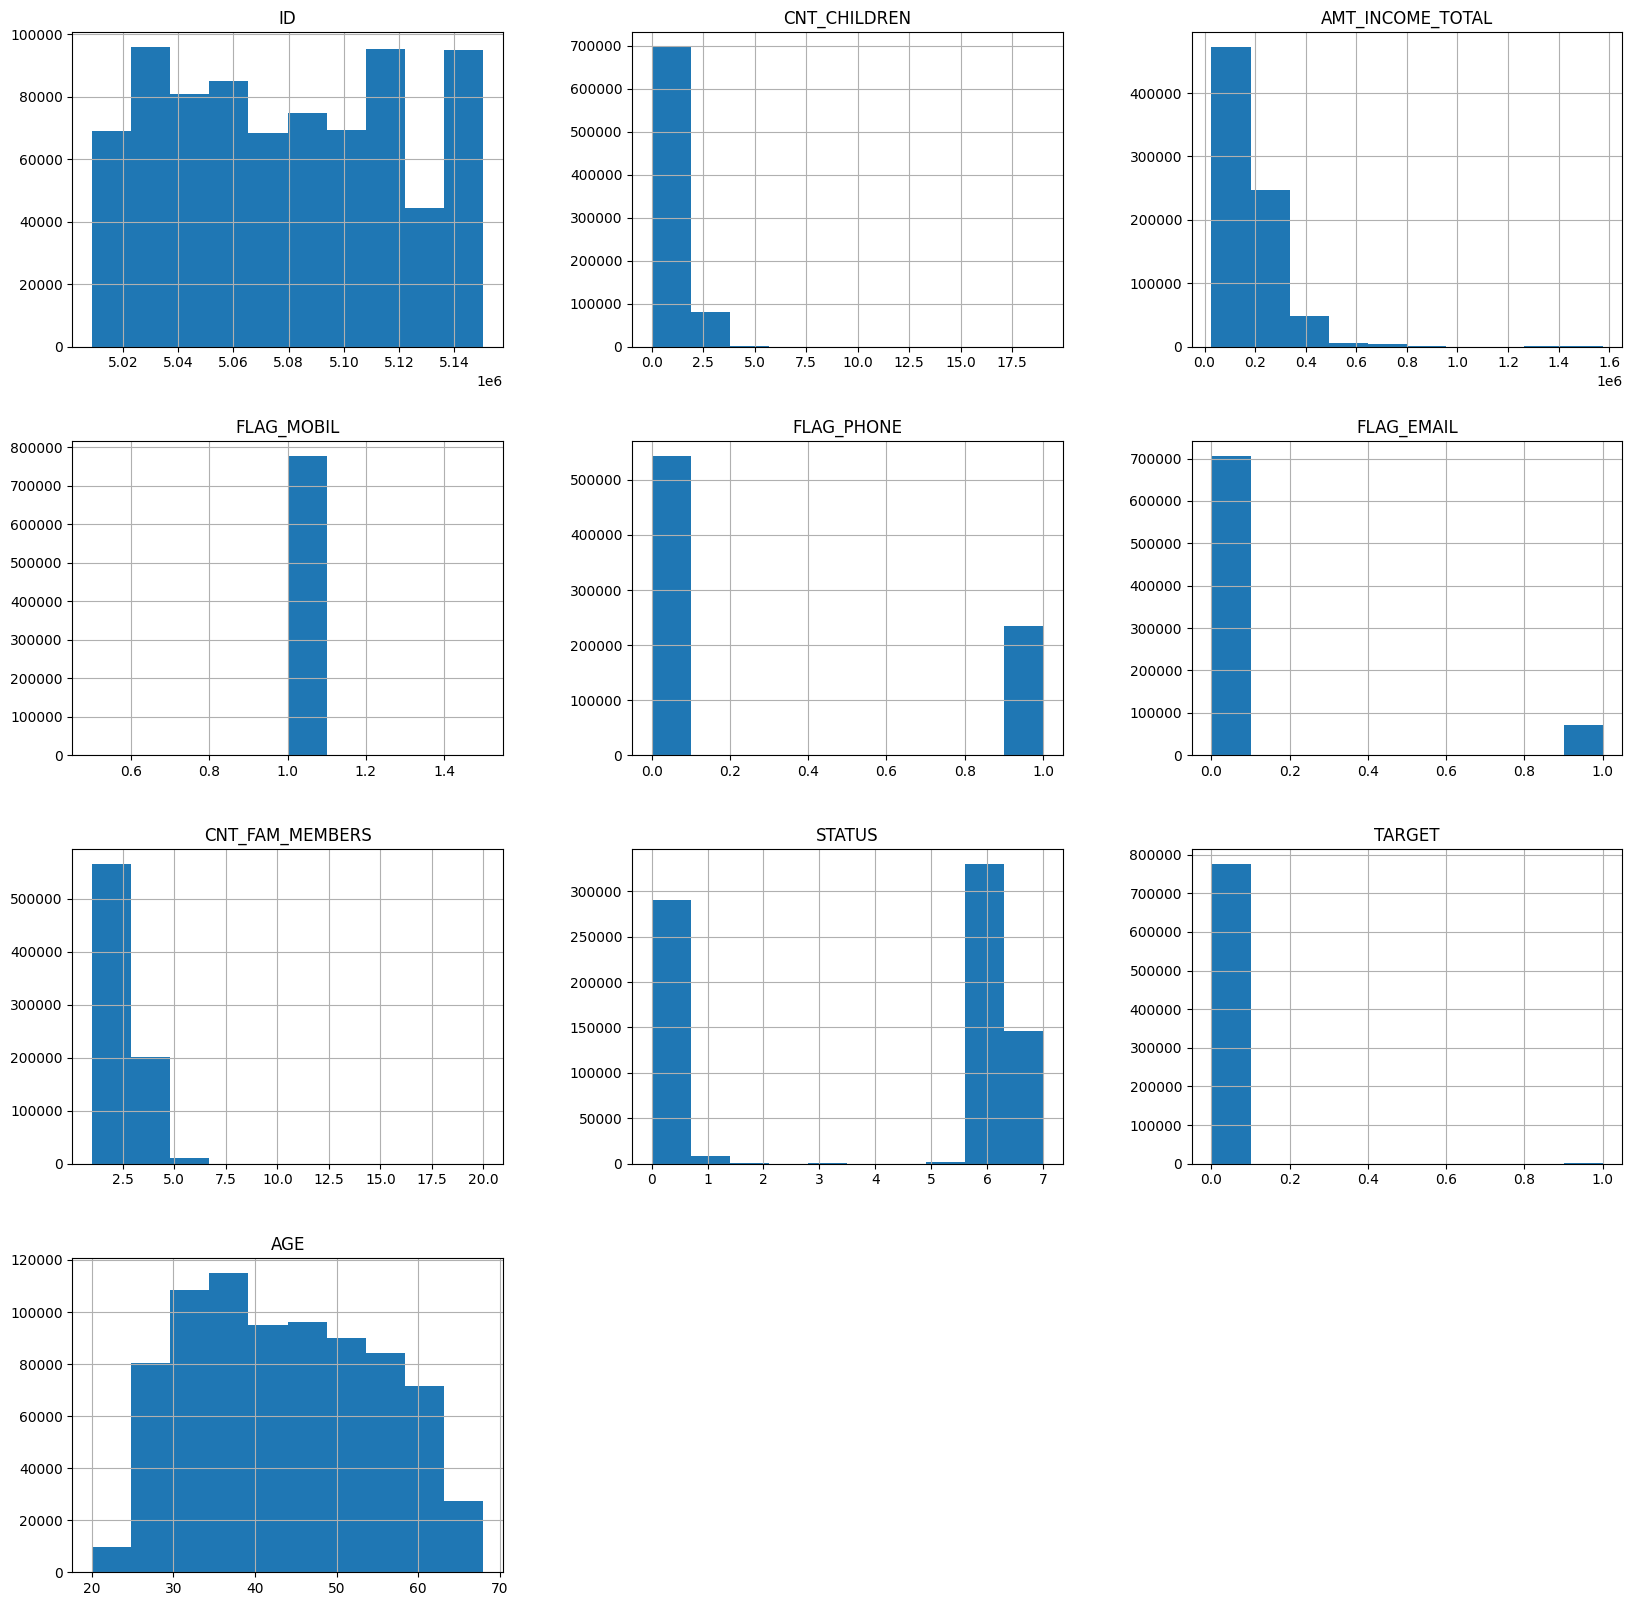

In [26]:
df_app.hist(figsize=(20,20))

In [27]:
df_app.head(1)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS,TARGET,HAVE_CHILDREN,AGE
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,Unknown,2,6,0,N,32


<h3 align='center'>Function of plotting</h3>

In [28]:
# # Function of Plotting
# def count_plot(data, columns, amt_income):
#   fig,ax = plt.subplots(1,2)
#   # Plot 1
#   splot = data[columns].value_counts().plot.bar(ax=ax[0], figsize=(10,5)) # figsize(x,y)
#   for p in splot.patches:
#       splot.annotate(format(p.get_height(), ',.0f'), # Getting annotate into thousand using format pacifier ,.0f
#                       (p.get_x() + p.get_width() / 2., p.get_height()),
#                       ha = 'center',
#                       va = 'center',
#                       xytext = (0, 10),
#                       textcoords = 'offset points')
#   ax[0].set_title('Count of {}\n'.format(columns))
#   ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=45) # Rotating xticks using axis
#   # Set yticks
#   # ax[0].set_ylim([0, 350000]) # set ylim ticks
#   sns.despine(right=True,top = True)

#   plt.tight_layout()

#   # Plot 2
#   splot2 = data.groupby([columns])[amt_income].mean().plot.bar(ax=ax[1], color='red', figsize=(10,5))
#   for p in splot2.patches:
#       splot2.annotate(format(p.get_height(), ',.0f'), # Getting annotate into thousand using format pacifier ,.0f
#                       (p.get_x() + p.get_width() / 2., p.get_height()),
#                       ha = 'center',
#                       va = 'center',
#                       xytext = (0, 10),
#                       textcoords = 'offset points')
#   ax[1].set_title('Average Amt Income Total of {}\n'.format(columns))
#   ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation=45) # Rotating xticks using axis
#   ax[1].set(xlabel=None)
#   sns.despine(right=True,top = True)
#   # Set yticks
#   # ax[1].set_ylim([0, 350000]) # set ylim ticks

#   plt.tight_layout()
#   plt.show()

def one_plot(data, columns):
  # Plot 1
  splot = data[columns].value_counts().sort_values(ascending=True).plot.bar(color='#ff7675',figsize=(10,5)) # figsize(x,y)
  for p in splot.patches:
      splot.annotate(format(p.get_height(), ',.0f'), # Getting annotate into thousand using format pacifier ,.0f
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center',
                      va = 'center',
                      xytext = (0, 10),
                      textcoords = 'offset points',
                      fontsize=8)
      splot.annotate(format(p.get_height()/df_app.shape[0], '.2%'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center',
                      va = 'center',
                      xytext = (0, 20),
                      textcoords = 'offset points',
                      fontsize=8)

  plt.title('Count of {}\n'.format(columns))
  plt.xticks(rotation=90)
  # Set yticks
  # plot.set_ylim([0, 350000]) # set ylim ticks
  sns.despine(right=True,top = True)

  plt.tight_layout()
  plt.show()

# Function of AVERAGE and SUM AMT_INCOME_TOTAL
def sumAverage_plot(data, columns):
  splot2 = data.groupby([columns])['AMT_INCOME_TOTAL'].mean().plot.bar(color='#ff7675', figsize=(5,5)) # figsize(x,y)
  # splot2 = data.groupby([columns])['AMT_INCOME_TOTAL'].mean().plot.bar(color='#fdcb6e', figsize=(5,5))
  for k in splot2.patches:
    splot2.annotate(format(k.get_height(), ',.0f'), # Getting annotate into thousand using format pacifier ,.0f
                    (k.get_x() + k.get_width() / 2., k.get_height()),
                    ha = 'center',
                    va = 'center',
                    xytext = (0, 10),
                    textcoords = 'offset points')
  # plt.legend(['Average Income'])
  plt.title('Average AMT_INCOME_TOTAL by {}'.format(columns))
  plt.xticks(rotation=45)
  sns.despine(top=True, right=True)
  plt.tight_layout()
  plt.show()

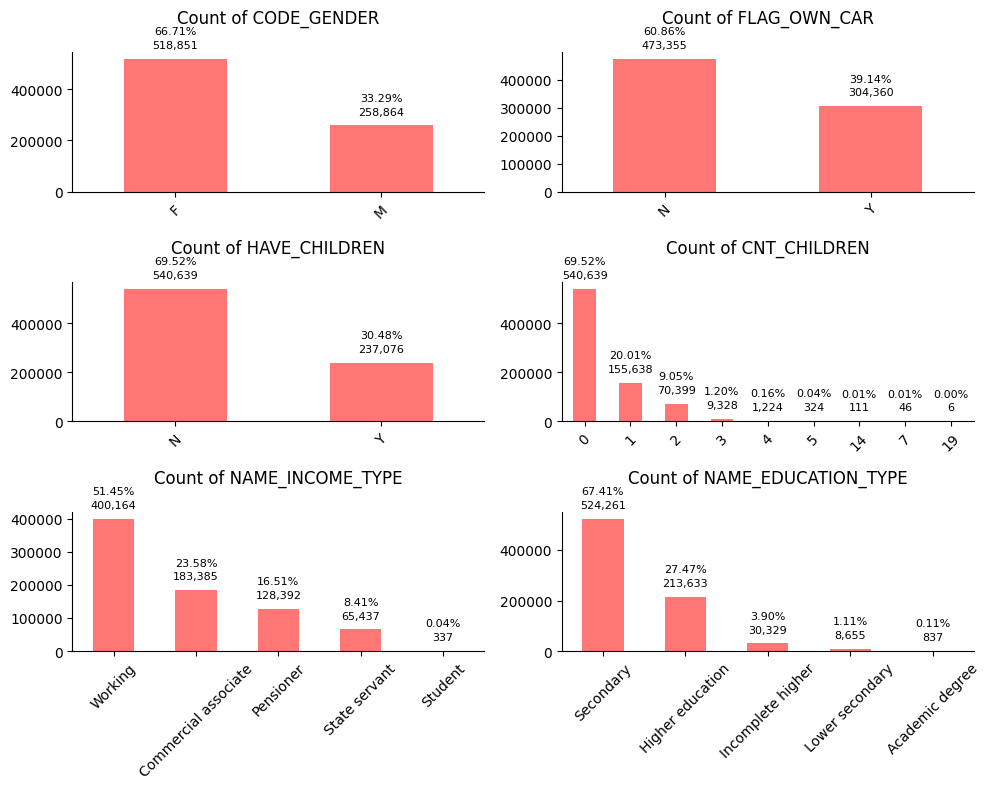

In [29]:
# Function countPercent_plot
kolom = ['CODE_GENDER', 'FLAG_OWN_CAR',
         'HAVE_CHILDREN', 'CNT_CHILDREN',
         'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE']

plt.figure(figsize=(10,8))
plt.subplots_adjust(hspace=0.5)

for index, i in enumerate(kolom):
    ax = plt.subplot(3, 2, index + 1)
    splot = df_app[i].value_counts().plot.bar(color='#ff7675', ax=ax, figsize=(10,8)) # figsize(x,y)
    for p in splot.patches:
        splot.annotate(format(p.get_height(), ',.0f'), # Getting annotate into thousand using format pacifier ,.0f
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha = 'center',
                        va = 'center',
                        xytext = (0, 10),
                        textcoords = 'offset points',
                        fontsize=8)
        splot.annotate(format(p.get_height()/df_app.shape[0], '.2%'),
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha = 'center',
                  va = 'center',
                  xytext = (0, 20),
                  textcoords = 'offset points',
                  fontsize=8)

    ax.set_title('Count of {}\n'.format(i))
    ax.set_xticklabels(ax.get_xticklabels(),rotation=45) # Rotating xticks using axis
    # Set yticks
    # ax[0].set_ylim([0, 350000]) # set ylim ticks
    sns.despine(right=True,top = True)
    plt.tight_layout()

plt.show()

Note<br>
1. 66% of customer is Female
2. 39% of customer have a car
3. 69% of customer doesn't have a children
4. Maximum number of children is 19
5. 51% of customer income type by Working
6. 67% of customers is Secondary level


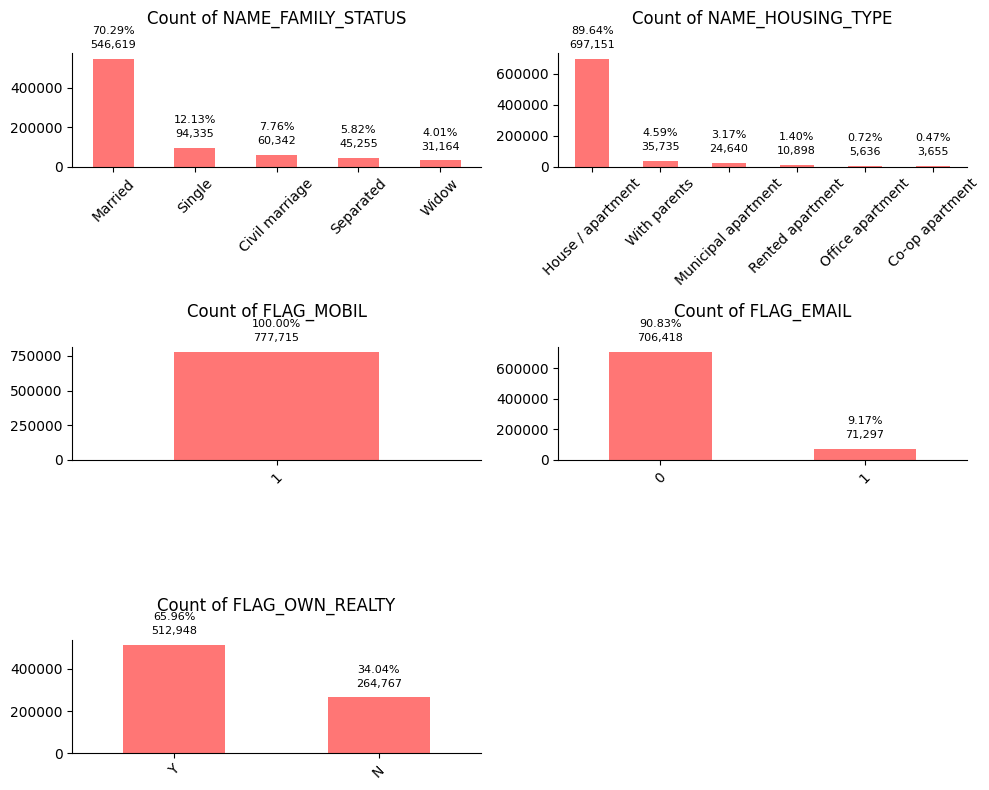

In [30]:
# Function countPercent_plot
kolom = ['NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
         'FLAG_MOBIL', 'FLAG_EMAIL',
         'FLAG_OWN_REALTY']
plt.figure(figsize=(10,8))
plt.subplots_adjust(hspace=0.5)

for index, i in enumerate(kolom):
    ax = plt.subplot(3, 2, index + 1)
    splot = df_app[i].value_counts().plot.bar(color='#ff7675', ax=ax, figsize=(10,8)) # figsize(x,y)
    for p in splot.patches:
        splot.annotate(format(p.get_height(), ',.0f'), # Getting annotate into thousand using format pacifier ,.0f
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha = 'center',
                        va = 'center',
                        xytext = (0, 10),
                        textcoords = 'offset points',
                        fontsize=8)
        splot.annotate(format(p.get_height()/df_app.shape[0], '.2%'),
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha = 'center',
                  va = 'center',
                  xytext = (0, 20),
                  textcoords = 'offset points',
                  fontsize=8)

    ax.set_title('Count of {}\n'.format(i))
    ax.set_xticklabels(ax.get_xticklabels(),rotation=45) # Rotating xticks using axis
    # Set yticks
    # ax[0].set_ylim([0, 350000]) # set ylim ticks
    sns.despine(right=True,top = True)
    plt.tight_layout()

plt.show()

Note<br>
1. 70% of customers is Married
2. 89% of customer housing type is House / Apartment
3. All customer have phone
4. 90% of customer doesn't have email
5. 69% of customer have properties

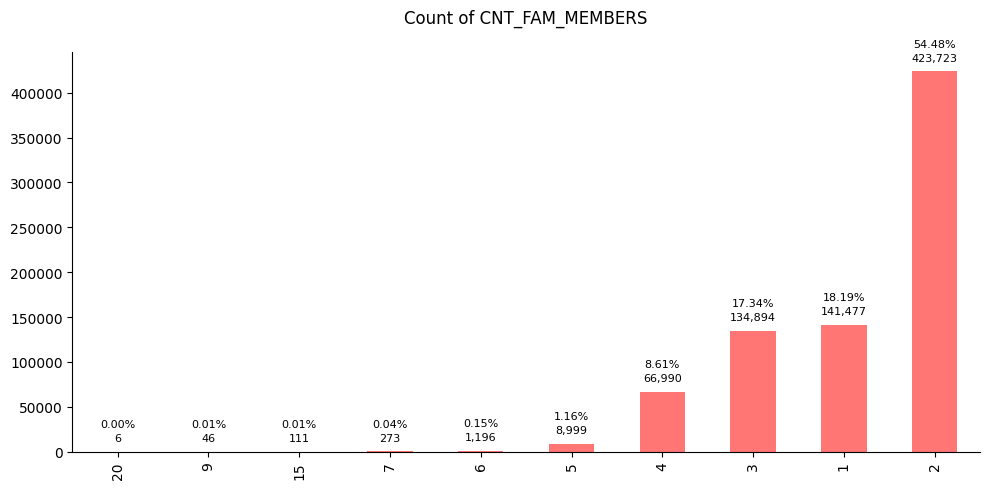

In [31]:
one_plot(df_app, 'CNT_FAM_MEMBERS')

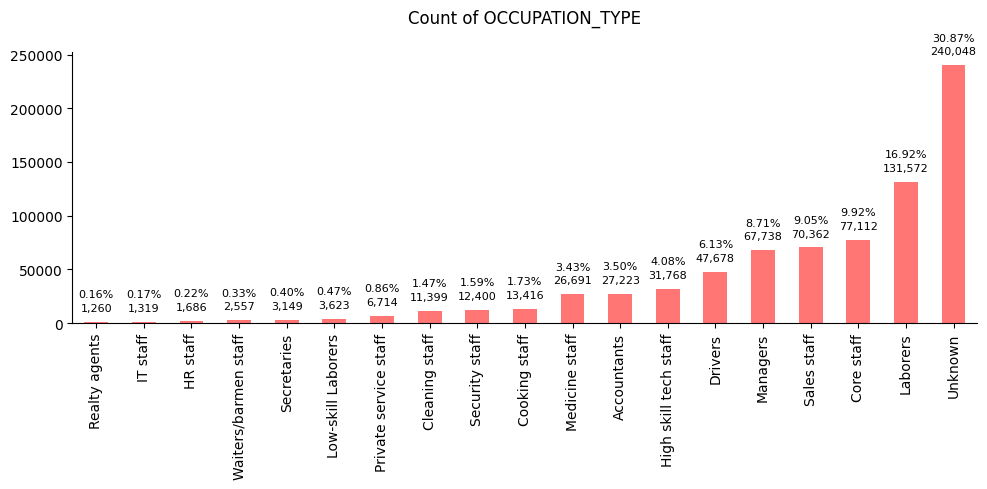

In [32]:
one_plot(df_app, 'OCCUPATION_TYPE')

Note<br>
1. Family that have 2 members is most in this data
2. Maximum number of family members is 20
3. 30% we don't have data occupation type of customer

<ipython-input-33-a8e506e8cf0f>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_app['AGE'],kde=True)


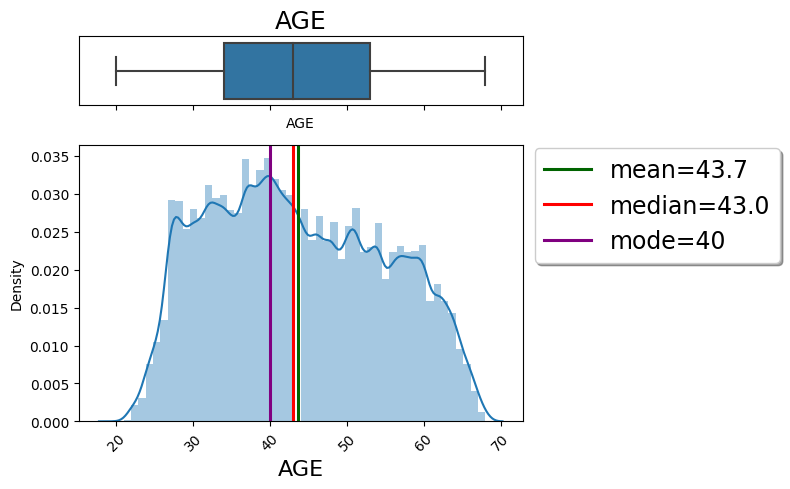

In [33]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8,5),gridspec_kw={"height_ratios": (.2, .8)})

ax[0].set_title('AGE',fontsize=18)
sns.boxplot(x='AGE', data=df_app, ax=ax[0])
ax[0].set(yticks=[])
sns.distplot(df_app['AGE'],kde=True)
plt.xticks(rotation=45)

ax[1].set_xlabel('AGE', fontsize=16)
plt.axvline(df_app['AGE'].mean(), color='darkgreen', linewidth=2.2, label='mean=' + str(np.round(df_app['AGE'].mean(),1)))
plt.axvline(df_app['AGE'].median(), color='red', linewidth=2.2, label='median='+ str(np.round(df_app['AGE'].median(),1)))
plt.axvline(df_app['AGE'].mode()[0], color='purple', linewidth=2.2, label='mode='+ str(df_app['AGE'].mode()[0]))
plt.legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=17, fancybox=True, shadow=True, frameon=True)

plt.tight_layout()
plt.show()

In [34]:
df_app.describe()[['AGE']].T

,count,mean,std,min,25%,50%,75%,max
AGE,777715.0,43.671326,11.247138,20.0,34.0,43.0,53.0,68.0


In [35]:
df_app['AGE'].value_counts().sort_values(ascending=False).head()

40    25928
37    25792
39    24772
41    23838
32    23311
Name: AGE, dtype: int64

Note<br>
1. The most age in dataset is 40
2. Age 68 is the oldest age for customers

<h1 align='center'><b>AMT_INCOME_TOTAL</b></h1>

<ipython-input-70-ba832ee79ef0>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_app['AMT_INCOME_TOTAL'],kde=True)


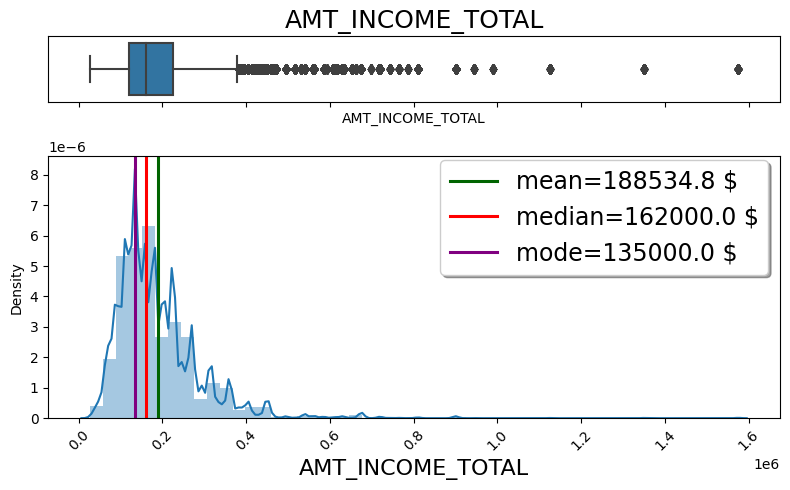

In [70]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8,5),gridspec_kw={"height_ratios": (.2, .8)})

ax[0].set_title('AMT_INCOME_TOTAL',fontsize=18)
sns.boxplot(x='AMT_INCOME_TOTAL', data=df_app, ax=ax[0])
ax[0].set(yticks=[])
sns.distplot(df_app['AMT_INCOME_TOTAL'],kde=True)
plt.xticks(rotation=45)

ax[1].set_xlabel('AMT_INCOME_TOTAL', fontsize=16)
plt.axvline(df_app['AMT_INCOME_TOTAL'].mean(), color='darkgreen', linewidth=2.2, label='mean=' + str(np.round(df_app['AMT_INCOME_TOTAL'].mean(),1)) + ' $')
plt.axvline(df_app['AMT_INCOME_TOTAL'].median(), color='red', linewidth=2.2, label='median='+ str(np.round(df_app['AMT_INCOME_TOTAL'].median(),1)) + ' $')
plt.axvline(df_app['AMT_INCOME_TOTAL'].mode()[0], color='purple', linewidth=2.2, label='mode='+ str(df_app['AMT_INCOME_TOTAL'].mode()[0]) + ' $')
plt.legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=17, fancybox=True, shadow=True, frameon=True)

plt.tight_layout()
plt.show()

In [74]:
# Top 5 income customers ?
print('Top 5 income customer:\n', df_app['AMT_INCOME_TOTAL'].sort_values(ascending=False).value_counts().head(5))
print()
# Maximum Income
print('Maximum income: ', df_app['AMT_INCOME_TOTAL'].max())

Top 5 income customer:
 135000.0    90217
180000.0    68579
157500.0    62686
112500.0    61622
225000.0    61399
Name: AMT_INCOME_TOTAL, dtype: int64

Maximum income:  1575000.0


Note <br>
1. Average income customer is 188534.8 $

2. Most income customer is 135000 $

3. Maximum income is 1575000.0 $

<h1 align='center'><b>CODE_GENDER</b></h1>

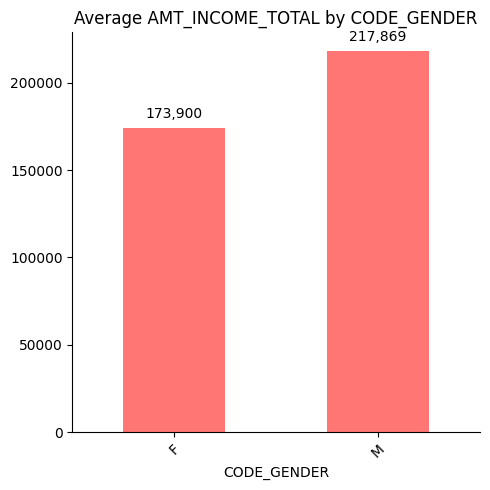

,AMT_INCOME_TOTAL
CODE_GENDER,
F,1575000.0
M,1350000.0


In [73]:
sumAverage_plot(df_app, 'CODE_GENDER')
df_app.groupby(['CODE_GENDER']).max()[['AMT_INCOME_TOTAL']].sort_values(by='AMT_INCOME_TOTAL', ascending=False)

Note<br>
1. Male have bigger average amt income than female
3. Female have highest amt income at 1575000 $

<h1 align='center'><b>HAVE_CHILDREN</b></h1>

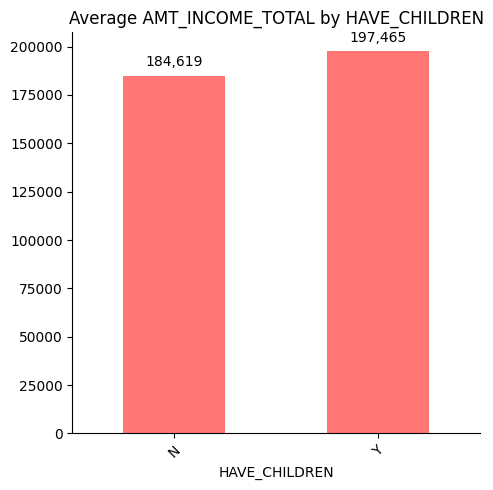

,AMT_INCOME_TOTAL
HAVE_CHILDREN,
Y,1575000.0
N,1350000.0


In [ ]:
sumAverage_plot(df_app, 'HAVE_CHILDREN')

# What is the maximum income in each housing type?
df_app.groupby(['HAVE_CHILDREN']).max()[['AMT_INCOME_TOTAL']].sort_values(by='AMT_INCOME_TOTAL', ascending=False)

Note<br>
1. Customer who have children is have highest average income 197465 $

2. Customer who doesn't have children have highest income 1575000 $

<h1 align='center'><b>FLAG_OWN_CAR</b></h1>

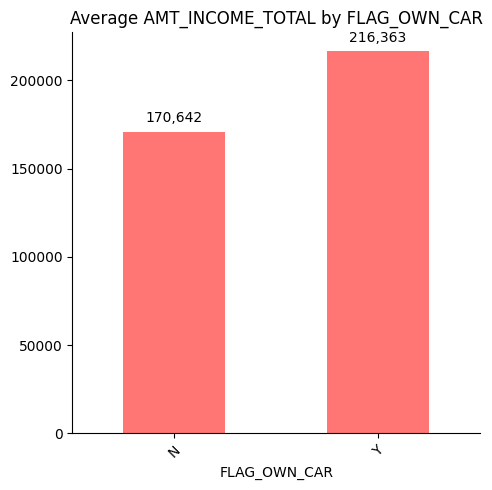

,AMT_INCOME_TOTAL,CODE_GENDER
FLAG_OWN_CAR,,
Y,1575000.0,M
N,990000.0,M


In [ ]:
sumAverage_plot(df_app, 'FLAG_OWN_CAR')
df_app.groupby(['FLAG_OWN_CAR']).max()[['AMT_INCOME_TOTAL', 'CODE_GENDER']].sort_values(by='AMT_INCOME_TOTAL', ascending=False)

Note<br>
1. Average income is highest on customer who has a car
2. Maximum income total is the customer using car
3. Gender male is customer who has highest income with car or not

<h1 align='center'><b>FLAG_OWN_REALTY</b></h1>

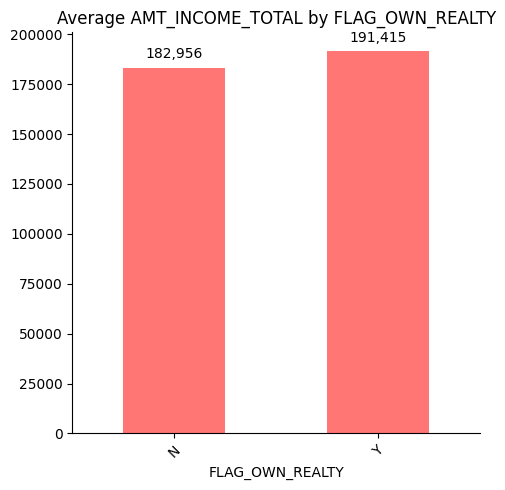

,AMT_INCOME_TOTAL
FLAG_OWN_REALTY,
Y,1575000.0
N,1350000.0


In [ ]:
sumAverage_plot(df_app, 'FLAG_OWN_REALTY')
df_app.groupby(['FLAG_OWN_REALTY']).max()[['AMT_INCOME_TOTAL']].sort_values(by='AMT_INCOME_TOTAL', ascending=False)

Note<br>
1. Average amt income total customers who own properties is highest then doesn't have
2. Customer who own properties has a highest income in 1575000 $

<h1 align='center'><b>NAME_INCOME_TYPE</b></h1>

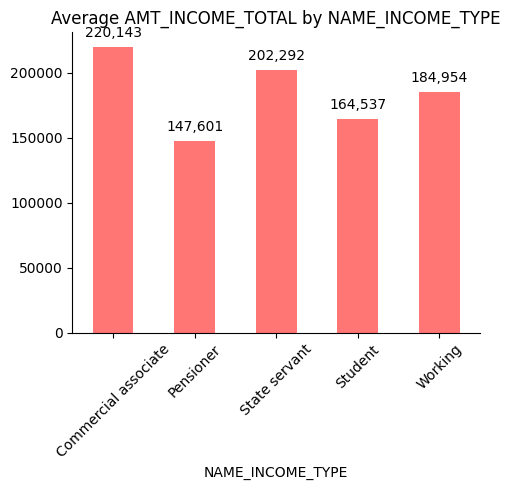

Lowest student amt income:  112500.0  $


,AMT_INCOME_TOTAL,CODE_GENDER
NAME_INCOME_TYPE,,
Commercial associate,1575000.0,M
Working,1125000.0,M
State servant,990000.0,M
Pensioner,742500.0,M
Student,171000.0,M


In [ ]:
sumAverage_plot(df_app, 'NAME_INCOME_TYPE')
# What is income total student?
print('Lowest student amt income: ', df_app[df_app['NAME_INCOME_TYPE']=='Student']['AMT_INCOME_TOTAL'].min(), ' $')

# What is the maximum income by income type customer?
df_app.groupby(['NAME_INCOME_TYPE']).max()[['AMT_INCOME_TOTAL', 'CODE_GENDER']].sort_values(by='AMT_INCOME_TOTAL', ascending=False)

Note<br>
1. We have customer who is still student and annual income is greater than or equal to 112500 $
2. The highest average and total annual income is by Commercial Associate
3. All the highest incomes are in the male gender


<h1 align='center'><b>NAME_EDUCATION_TYPE</b></h1>

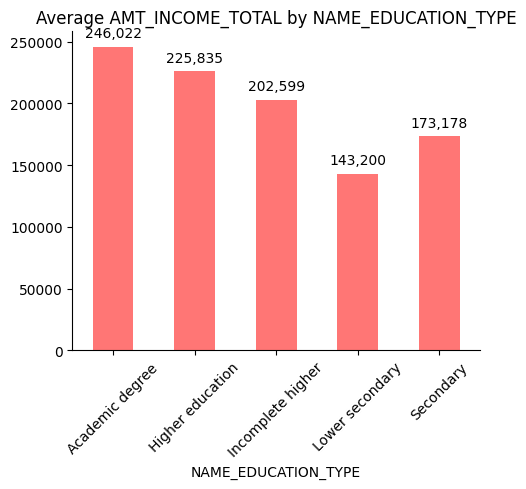

,AMT_INCOME_TOTAL
NAME_EDUCATION_TYPE,
Higher education,1575000.0
Secondary,1125000.0
Incomplete higher,810000.0
Academic degree,450000.0
Lower secondary,360000.0


In [ ]:
sumAverage_plot(df_app, 'NAME_EDUCATION_TYPE')

# What is the maximum income in each education type of customer?
df_app.groupby(['NAME_EDUCATION_TYPE']).max()[['AMT_INCOME_TOTAL']].sort_values(by='AMT_INCOME_TOTAL', ascending=False)

Note <br>

2. Academic degree has a highest average income 246022 $

3. Higher education has a highest income 1575000 $

<h1 align='center'><b>NAME_FAMILY_STATUS</b></h1>

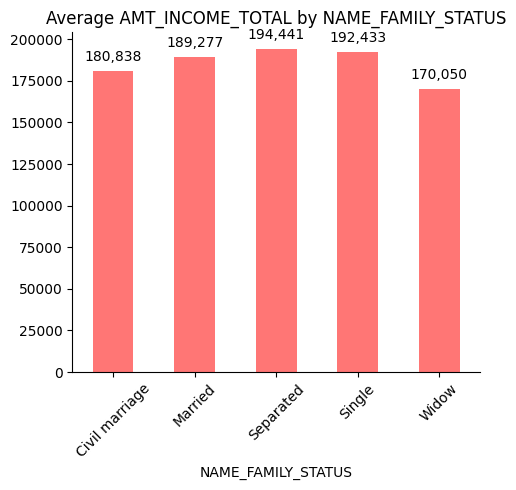

,AMT_INCOME_TOTAL
NAME_FAMILY_STATUS,
Single,1575000.0
Married,1350000.0
Civil marriage,900000.0
Separated,742500.0
Widow,720000.0


In [ ]:
sumAverage_plot(df_app, 'NAME_FAMILY_STATUS')

# What is the maximum income in each family status?
df_app.groupby(['NAME_FAMILY_STATUS']).max()[['AMT_INCOME_TOTAL']].sort_values(by='AMT_INCOME_TOTAL', ascending=False)

Note<br>
2. Family status separated has a highest average income 194441 $

3. Family status single has a highest income 1575000 $

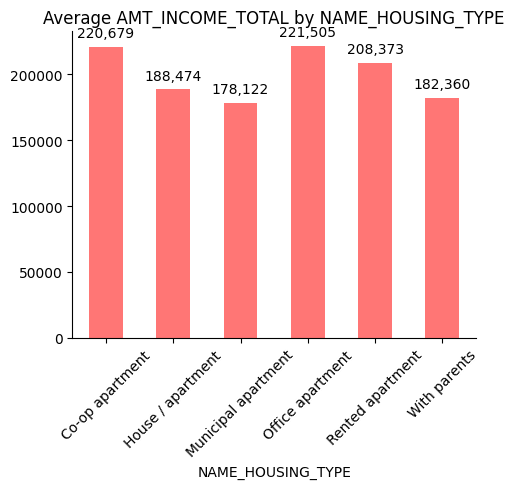

,AMT_INCOME_TOTAL
NAME_HOUSING_TYPE,
House / apartment,1575000.0
Municipal apartment,1350000.0
Rented apartment,1125000.0
Co-op apartment,900000.0
Office apartment,810000.0
With parents,716323.5


In [ ]:
sumAverage_plot(df_app, 'NAME_HOUSING_TYPE')

# What is the maximum income in each housing type?
df_app.groupby(['NAME_HOUSING_TYPE']).max()[['AMT_INCOME_TOTAL']].sort_values(by='AMT_INCOME_TOTAL', ascending=False)

Note<br>
1. Customer whose have Housing type is office apartement has a highest average income 221505 $

2. Customer whose have Housing type is house / apartment has a highest income 1575000 $

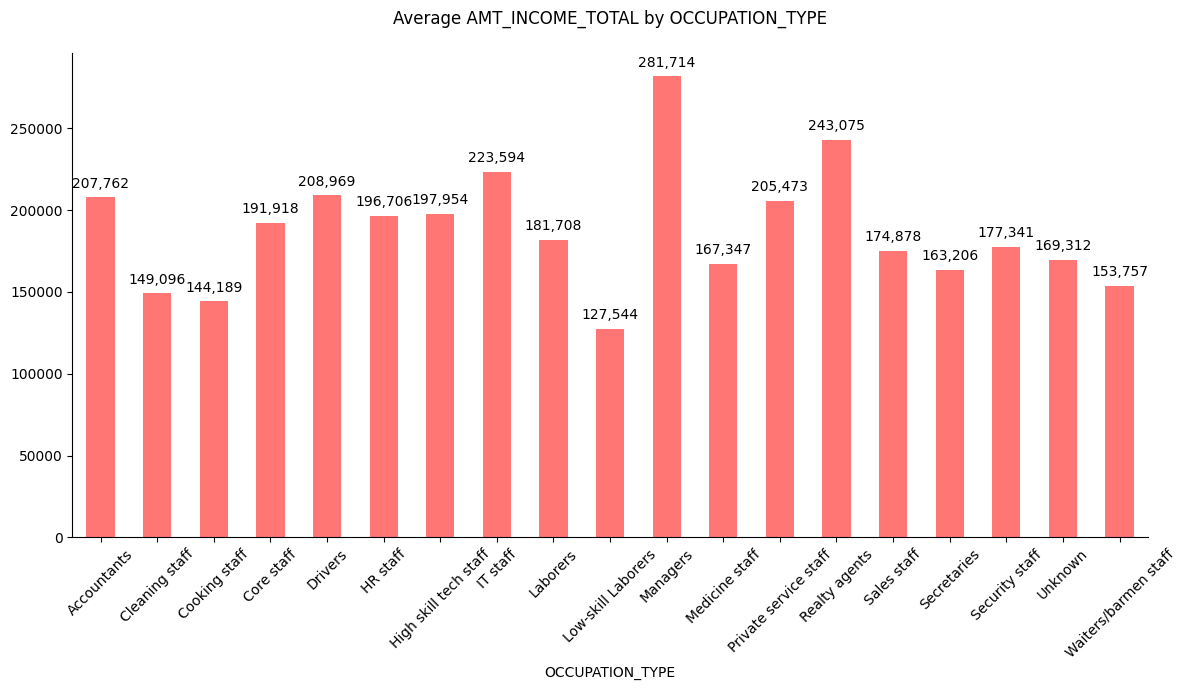

,AMT_INCOME_TOTAL
OCCUPATION_TYPE,
Managers,1575000.0
Core staff,990000.0
Drivers,900000.0
High skill tech staff,900000.0
Laborers,900000.0
Unknown,900000.0
Security staff,810000.0
Sales staff,697500.0
HR staff,675000.0


In [ ]:
splot = df_app.groupby(['OCCUPATION_TYPE'])['AMT_INCOME_TOTAL'].mean().plot.bar(color='#ff7675', figsize=(12,7)) # figsize(x,y)
for k in splot.patches:
  splot.annotate(format(k.get_height(), ',.0f'), # Getting annotate into thousand using format pacifier ,.0f
                  (k.get_x() + k.get_width() / 2., k.get_height()),
                  ha = 'center',
                  va = 'center',
                  xytext = (0, 10),
                  textcoords = 'offset points')
# plt.legend(['Average Income'])
plt.title('Average AMT_INCOME_TOTAL by {}\n'.format('OCCUPATION_TYPE'))
plt.xticks(rotation=45)
sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

# What is the maximum income in each family status?
df_app.groupby(['OCCUPATION_TYPE']).max()[['AMT_INCOME_TOTAL']].sort_values(by='AMT_INCOME_TOTAL', ascending=False)

Note<br>
1. Customer whose have Occupation Type is Manager has a highest average income 281714 $

2. Customer whose have Occupation Type is Manager has a highest income 1575000 $

<h1 align='center'>Vintage Analysis Technique</h1>
<p align='left'>Using Vintage Analysis technique because we have to find definition 'good' or 'bad' for every customer</p>
<p> In simple words, the vintage analysis measures the performance of a portfolio in different periods of time after the loan (or credit card) was granted. Performance can be measured in the form of cumulative charge-off rate, proportion of customers 30/60/90 days past due (DPD), utilization ratio, average balance etc.</p

In [ ]:
# Make a group by ID
grouped = df_credit.groupby(['ID'])

# Convert credit data into wide format
pivot_tb = df_credit.pivot(index='ID', columns='MONTHS_BALANCE', values='STATUS')

# Make columns that have values when loas in granted
pivot_tb['open_month'] = grouped['MONTHS_BALANCE'].min()

# Make columns that have values might be observer over or canceling account
pivot_tb['end_month'] = grouped['MONTHS_BALANCE'].max()

# Make ID columns as index
pivot_tb['ID'] = pivot_tb.index

# Choose columns just what will we gonna use
pivot_tb = pivot_tb[['ID', 'open_month', 'end_month']]

# Calculate obeserve window
pivot_tb['window'] = pivot_tb['end_month'] - pivot_tb['open_month']

# Reset index for ID
pivot_tb.reset_index(drop=True, inplace=True)

# Merge 2 dataframe
df_credit = df_credit.merge(pivot_tb, on='ID', how='left')

# Make copy dataframe
df_credit0 = df_credit.copy()

# Remove customer whose observee window less than 20
df_credit = df_credit[df_credit['window'] > 20]

# Analyze > 60 days past due
df_credit['status'] = np.where((df_credit['STATUS'] == '2') |
                              (df_credit['STATUS'] == '3') |
                               (df_credit['STATUS'] == '4') |
                               (df_credit['STATUS'] == '5'),1 ,0)

# Convert into int8
df_credit['status'] = df_credit['status'].astype(np.int8)

# 1:overdue 0:not
# Calculate onth on book: how many months after opening account
df_credit['month_on_book'] = df_credit['MONTHS_BALANCE'] - df_credit['open_month']

df_credit

,ID,MONTHS_BALANCE,STATUS,open_month,end_month,window,status,month_on_book
23,5001713,0,X,-21,0,21,0,21
24,5001713,-1,X,-21,0,21,0,20
25,5001713,-2,X,-21,0,21,0,19
26,5001713,-3,X,-21,0,21,0,18
27,5001713,-4,X,-21,0,21,0,17
...,...,...,...,...,...,...,...,...
1048570,5150487,-25,C,-29,0,29,0,4
1048571,5150487,-26,C,-29,0,29,0,3
1048572,5150487,-27,C,-29,0,29,0,2
1048573,5150487,-28,C,-29,0,29,0,1


In [ ]:
# Denominator
# Count how many customer in every month the account was opened
denominator = pivot_tb.groupby(['open_month']).agg({'ID':['count']})
denominator.reset_index(inplace=True)
denominator.columns = ['open_month', 'sta_sum']
denominator

,open_month,sta_sum
0,-60,415
1,-59,406
2,-58,440
3,-57,400
4,-56,470
...,...,...
56,-4,874
57,-3,919
58,-2,771
59,-1,686


In [ ]:
# Ventage table
vintage = df_credit.groupby(['open_month', 'month_on_book']).agg({'ID':'count'})
vintage.reset_index(inplace=True)
vintage.columns = ['open_month', 'month_on_book', 'sta_sum']
vintage['due_count'] = np.nan

# Delete aggregate column
vintage = vintage[['open_month', 'month_on_book', 'due_count']]

# Merge sta_sum column into vintage table
vintage = pd.merge(vintage, denominator, on = ['open_month'], how='left')

vintage

,open_month,month_on_book,due_count,sta_sum
0,-60,0,NaN,415
1,-60,1,NaN,415
2,-60,2,NaN,415
3,-60,3,NaN,415
4,-60,4,NaN,415
...,...,...,...,...
1655,-21,17,NaN,858
1656,-21,18,NaN,858
1657,-21,19,NaN,858
1658,-21,20,NaN,858


In [ ]:
for j in range(-60,1): # outer loop: month in which account was opened
    ls = []
    for i in range(0,61): # inner loop time after the credit card was granted
        due = list(df_credit[(df_credit['status'] == 1) & (df_credit['month_on_book'] == i) & (df_credit['open_month'] == j)]['ID']) # get ID which satisfy the condition
        ls.extend(due) # As time goes, add bad customers
        vintage.loc[(vintage['month_on_book'] == i) & (vintage['open_month'] == j), 'due_count'] = len(set(ls)) # calculate non-duplicate ID numbers using set()

vintage['sta_rate']  = vintage['due_count'] / vintage['sta_sum'] # calculate cumulative % of bad customers
vintage

,open_month,month_on_book,due_count,sta_sum,sta_rate
0,-60,0,0.0,415,0.000000
1,-60,1,0.0,415,0.000000
2,-60,2,0.0,415,0.000000
3,-60,3,0.0,415,0.000000
4,-60,4,0.0,415,0.000000
...,...,...,...,...,...
1655,-21,17,15.0,858,0.017483
1656,-21,18,15.0,858,0.017483
1657,-21,19,15.0,858,0.017483
1658,-21,20,15.0,858,0.017483


<h3>Using pivot table to convert long data into wide data</h3>
<p>Next step is to calculate the cumulative % of bad customers or cumulative charge-off rate (also known as cumulative loss rate) against months on books (MOB) which is the number of months that have completed since the loan origination Date. New Vintage means recently opened accounts.</p>

In [ ]:
### Vintage wide table
vintage_wide = vintage.pivot(index = 'open_month',
                             columns = 'month_on_book',
                             values = 'sta_rate')
vintage_wide

month_on_book,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
open_month,,,,,,,,,,,,,,,,,,,,,
-60,0.00000,0.000000,0.000000,0.000000,0.000000,0.002410,0.002410,0.007229,0.007229,0.009639,...,0.028916,0.028916,0.028916,0.028916,0.028916,0.028916,0.028916,0.031325,0.031325,0.031325
-59,0.00000,0.000000,0.000000,0.004926,0.004926,0.004926,0.007389,0.007389,0.007389,0.012315,...,0.029557,0.029557,0.029557,0.032020,0.032020,0.032020,0.032020,0.032020,0.032020,NaN
-58,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004545,0.006818,0.006818,...,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,NaN,NaN
-57,0.00000,0.000000,0.000000,0.000000,0.002500,0.002500,0.002500,0.007500,0.007500,0.007500,...,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,NaN,NaN,NaN
-56,0.00000,0.000000,0.004255,0.004255,0.008511,0.010638,0.010638,0.017021,0.017021,0.021277,...,0.036170,0.036170,0.036170,0.036170,0.038298,0.038298,NaN,NaN,NaN,NaN
-55,0.00000,0.000000,0.002058,0.006173,0.012346,0.016461,0.022634,0.022634,0.022634,0.024691,...,0.045267,0.045267,0.045267,0.045267,0.045267,NaN,NaN,NaN,NaN,NaN
-54,0.00000,0.000000,0.000000,0.002137,0.004274,0.004274,0.006410,0.012821,0.012821,0.017094,...,0.032051,0.032051,0.032051,0.032051,NaN,NaN,NaN,NaN,NaN,NaN
-53,0.00000,0.002028,0.002028,0.002028,0.004057,0.004057,0.008114,0.010142,0.010142,0.012170,...,0.028398,0.028398,0.028398,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-52,0.00000,0.000000,0.007233,0.009042,0.009042,0.009042,0.012658,0.012658,0.014467,0.016275,...,0.023508,0.023508,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


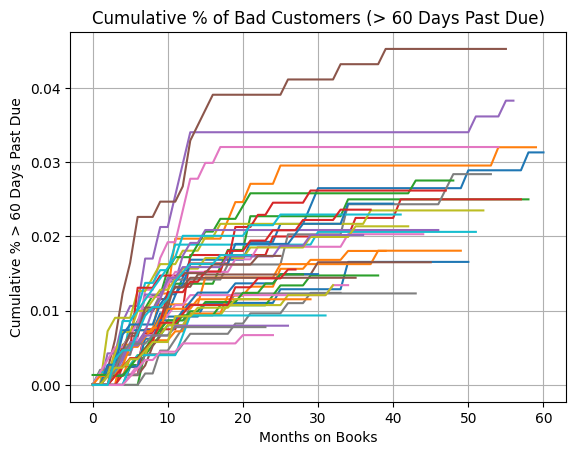

In [ ]:
# plot vintage line chart
plt.rcParams['figure.facecolor'] = 'white'
vintage0 = vintage_wide.replace(0,np.nan)
lst = [i for i in range(0,61)]
vintage_wide[lst].T.plot(legend = False, grid = True, title = 'Cumulative % of Bad Customers (> 60 Days Past Due)')
plt.xlabel('Months on Books')
plt.ylabel('Cumulative % > 60 Days Past Due')
plt.show()

<h3>The chart above show the bad rate growing at fast

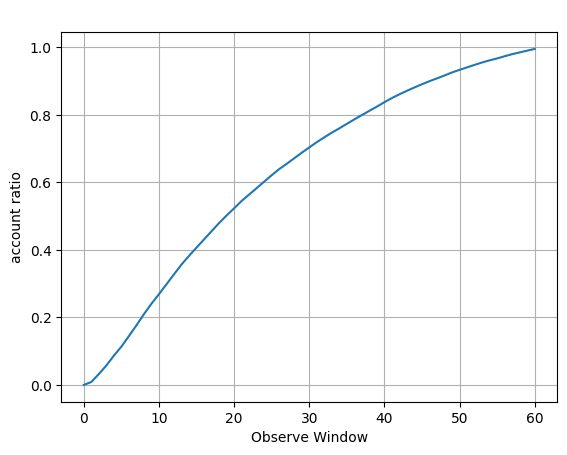

In [ ]:
lst = []
for i in range(0,61):
    ratio = len(pivot_tb[pivot_tb['window'] < i]) / len(set(pivot_tb['ID']))
    lst.append(ratio)

pd.Series(lst).plot(legend = False, grid = True, title = ' ')
plt.xlabel('Observe Window')
plt.ylabel('account ratio')
plt.show()

In [ ]:
def calculate_observe(df_credit, command):
    '''calculate observe window
    '''
    id_sum = len(set(pivot_tb['ID']))
    df_credit['status'] = 0
    exec(command)
    #df_credit.loc[(df_credit['STATUS'] == '4' )| (df_credit['STATUS'] == '5'), 'status'] = 1
    df_credit['month_on_book'] = df_credit['MONTHS_BALANCE'] - df_credit['open_month']
    minagg = df_credit[df_credit['status'] == 1].groupby('ID')['month_on_book'].min()
    minagg = pd.DataFrame(minagg)
    minagg['ID'] = minagg.index
    obslst = pd.DataFrame({'month_on_book':range(0,61), 'rate': None})
    lst = []
    for i in range(0,61):
        due = list(minagg[minagg['month_on_book']  == i]['ID'])
        lst.extend(due)
        obslst.loc[obslst['month_on_book'] == i, 'rate'] = len(set(lst)) / id_sum
    return obslst['rate']

command = "df_credit.loc[(df_credit['STATUS'] == '0') | (df_credit['STATUS'] == '1') | (df_credit['STATUS'] == '2') | (df_credit['STATUS'] == '3' )| (df_credit['STATUS'] == '4' )| (df_credit['STATUS'] == '5'), 'status'] = 1"
morethan1 = calculate_observe(df_credit, command)
command = "df_credit.loc[(df_credit['STATUS'] == '1') | (df_credit['STATUS'] == '2') | (df_credit['STATUS'] == '3' )| (df_credit['STATUS'] == '4' )| (df_credit['STATUS'] == '5'), 'status'] = 1"
morethan30 = calculate_observe(df_credit, command)
command = "df_credit.loc[(df_credit['STATUS'] == '2') | (df_credit['STATUS'] == '3' )| (df_credit['STATUS'] == '4' )| (df_credit['STATUS'] == '5'), 'status'] = 1"
morethan60 = calculate_observe(df_credit, command)
command = "df_credit.loc[(df_credit['STATUS'] == '3' )| (df_credit['STATUS'] == '4' )| (df_credit['STATUS'] == '5'), 'status'] = 1"
morethan90 = calculate_observe(df_credit, command)
command = "df_credit.loc[(df_credit['STATUS'] == '4' )| (df_credit['STATUS'] == '5'), 'status'] = 1"
morethan120 = calculate_observe(df_credit, command)
command = "df_credit.loc[(df_credit['STATUS'] == '5'), 'status'] = 1"
morethan150 = calculate_observe(df_credit, command)

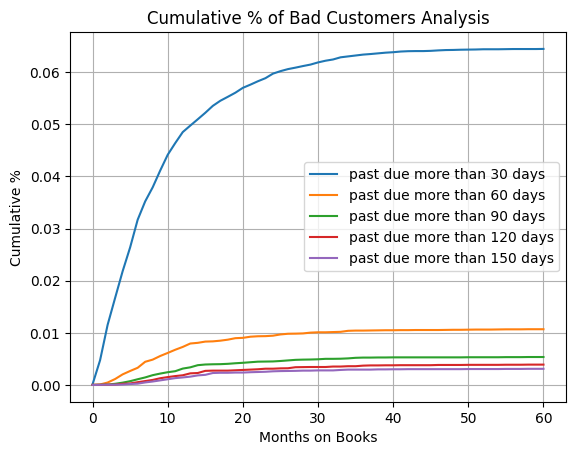

In [ ]:
obslst = pd.DataFrame({'past due more than 30 days': morethan30,
                       'past due more than 60 days': morethan60,
                       'past due more than 90 days': morethan90,
                       'past due more than 120 days': morethan120,
                       'past due more than 150 days': morethan150
                        })

obslst.plot(grid = True, title = 'Cumulative % of Bad Customers Analysis')
plt.xlabel('Months on Books')
plt.ylabel('Cumulative %')
plt.show()

In [ ]:
def calculate_rate(pivot_tb, command):
    '''calculate bad customer rate
    '''
    df_credit0['status'] = None
    exec(command) # excuate input code
    sumagg = df_credit0.groupby('ID')['status'].agg(sum)
    pivot_tb = pd.merge(pivot_tb, sumagg, on = 'ID', how = 'left')
    pivot_tb.loc[pivot_tb['status'] > 1, 'status'] = 1
    rate = pivot_tb['status'].sum() / len(pivot_tb)
    return round(rate, 5)

command = "df_credit0.loc[(df_credit0['STATUS'] == '0') | (df_credit0['STATUS'] == '1') | (df_credit0['STATUS'] == '2') | (df_credit0['STATUS'] == '3' )| (df_credit0['STATUS'] == '4' )| (df_credit0['STATUS'] == '5'), 'status'] = 1"
morethan1 = calculate_rate(pivot_tb, command)
command = "df_credit0.loc[(df_credit0['STATUS'] == '1') | (df_credit0['STATUS'] == '2') | (df_credit0['STATUS'] == '3' )| (df_credit0['STATUS'] == '4' )| (df_credit0['STATUS'] == '5'), 'status'] = 1"
morethan30 = calculate_rate(pivot_tb, command)
command = "df_credit0.loc[(df_credit0['STATUS'] == '2') | (df_credit0['STATUS'] == '3' )| (df_credit0['STATUS'] == '4' )| (df_credit0['STATUS'] == '5'), 'status'] = 1"
morethan60 = calculate_rate(pivot_tb, command)
command = "df_credit0.loc[(df_credit0['STATUS'] == '3' )| (df_credit0['STATUS'] == '4' )| (df_credit0['STATUS'] == '5'), 'status'] = 1"
morethan90 = calculate_rate(pivot_tb, command)
command = "df_credit0.loc[(df_credit0['STATUS'] == '4' )| (df_credit0['STATUS'] == '5'), 'status'] = 1"
morethan120 = calculate_rate(pivot_tb, command)
command = "df_credit0.loc[(df_credit0['STATUS'] == '5'), 'status'] = 1"
morethan150 = calculate_rate(pivot_tb, command)

summary_dt = pd.DataFrame({'situation':['past due more than 1 day',
                               'past due more than 30 days',
                               'past due more than 60 days',
                               'past due more than 90 days',
                               'past due more than 120 days',
                               'past due more than 150 days'],
                      'bad customer ratio':[morethan1,
                               morethan30,
                               morethan60,
                               morethan90,
                               morethan120,
                               morethan150,
                      ]})
summary_dt

,situation,bad customer ratio
0,past due more than 1 day,0.87054
1,past due more than 30 days,0.11634
2,past due more than 60 days,0.01450
3,past due more than 90 days,0.00720
4,past due more than 120 days,0.00528
5,past due more than 150 days,0.00424


<h1 align='center'>GET_DUMMIES</h1>
<h3>Convert rows into columns<br>
Using GET_DUMMIES

In [ ]:
# df_app = pd.get_dummies(df_app, drop_first=True, columns=['OCCUPATION_TYPE'])
# df_app.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Unknown,OCCUPATION_TYPE_Waiters/barmen staff
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,0,0,0,0,0,0,0,0,1,0
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,0,0,0,0,0,0,0,0,1,0
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,0,0,0,0,0,0,0,0,1,0
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,0,0,0,0,0,0,0,0,1,0
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,0,0,0,0,0,0,0,0,1,0


<h1 align='center'>LABEL ENCODER</h1>
<h3>Convert columns who has value Y and N in a rows it will be convert into 1 and 0 <br>
Using Label Encoder

In [ ]:
LE = LabelEncoder()

output1 = df_app['CODE_GENDER']
df_app['CODE_GENDER'] = LE.fit_transform(output1)
print(LE.classes_)

print(np.sort(df_app['FLAG_OWN_CAR'].unique()))
outpu2 = df_app['FLAG_OWN_CAR']
df_app['FLAG_OWN_CAR'] = LE.fit_transform(outpu2)
print(LE.classes_)

print(np.sort(df_app['FLAG_OWN_REALTY'].unique()))
output3 = df_app['FLAG_OWN_REALTY']
df_app['FLAG_OWN_REALTY'] = LE.fit_transform(output3)
print(LE.classes_)

print(np.sort(df_app['NAME_INCOME_TYPE'].unique()))
output4 = df_app['NAME_INCOME_TYPE']
df_app['NAME_INCOME_TYPE'] = LE.fit_transform(output4)
print(LE.classes_)

print(np.sort(df_app['NAME_EDUCATION_TYPE'].unique()))
output5 = df_app['NAME_EDUCATION_TYPE']
df_app['NAME_EDUCATION_TYPE'] = LE.fit_transform(output5)
print(LE.classes_)

print(np.sort(df_app['NAME_FAMILY_STATUS'].unique()))
output6 = df_app['NAME_FAMILY_STATUS']
df_app['NAME_FAMILY_STATUS'] = LE.fit_transform(output6)
print(LE.classes_)

print(np.sort(df_app['NAME_HOUSING_TYPE'].unique()))
output7 = df_app['NAME_HOUSING_TYPE']
df_app['NAME_HOUSING_TYPE'] = LE.fit_transform(output7)
print(LE.classes_)

print(np.sort(df_app['OCCUPATION_TYPE'].unique()))
output8 = df_app['OCCUPATION_TYPE']
df_app['OCCUPATION_TYPE'] = LE.fit_transform(output8)
print(LE.classes_)

print(np.sort(df_app['HAVE_CHILDREN'].unique()))
output9 = df_app['HAVE_CHILDREN']
df_app['HAVE_CHILDREN'] = LE.fit_transform(output9)
print(LE.classes_)

[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4 5]
[0 1 2 3 4 5]
['N' 'Y']
['N' 'Y']


<h1 align='center'>Modeling</h1>

In [ ]:
new_data = df_app.copy()
# new_data.drop(columns=['ID', 'open_month', 'end_month',
#                        'window', 'month_on_book'], axis=1, inplace=True)
new_data.drop(columns=['ID'], axis=1, inplace=True)
print(new_data.shape)
new_data.head()

(777715, 35)


,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,...,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Unknown,OCCUPATION_TYPE_Waiters/barmen staff
0,1,1,1,0,427500.0,4,1,0,4,1,...,0,0,0,0,0,0,0,0,1,0
1,1,1,1,0,427500.0,4,1,0,4,1,...,0,0,0,0,0,0,0,0,1,0
2,1,1,1,0,427500.0,4,1,0,4,1,...,0,0,0,0,0,0,0,0,1,0
3,1,1,1,0,427500.0,4,1,0,4,1,...,0,0,0,0,0,0,0,0,1,0
4,1,1,1,0,427500.0,4,1,0,4,1,...,0,0,0,0,0,0,0,0,1,0


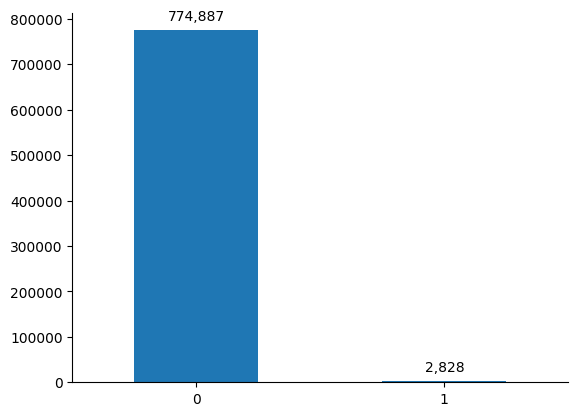

In [ ]:
splot = new_data['TARGET'].value_counts().plot.bar()
for p in splot.patches:
    splot.annotate(format(p.get_height(), ',.0f'), # Getting annotate into thousand using format pacifier ,.0f
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center',
                    va = 'center',
                    xytext = (0, 10),
                    textcoords = 'offset points')
sns.despine(top=True, right=True)
plt.xticks(rotation=0)
plt.show()

<p>as we can see above that we have imbalanced data, where 0 value have bigger than 1</p>
<p>we are going to need to reduce the size of our dataset anyways because the data is imbalance in the other class. In these situations, we are going to lose some data anyways and the decrease in the size of our dataset can actually be viewed as an advantage rather than a disadvantage.</p>


In [ ]:
x = new_data.drop(['TARGET'], axis=True)
y = new_data['TARGET']

<h1 align='center'>Scaler</h1>

In [ ]:
# Implementation Standard Scaler
sc = StandardScaler()
x_scaled = sc.fit_transform(x)

In [ ]:
# Implementation PCA
pca = PCA()
pct = pca.fit_transform(x_scaled)
pct

array([[ 6.50832891e-01, -2.43420975e+00,  6.69937165e-01, ...,
        -3.80839414e-02,  2.34766965e-01, -1.17182238e-15],
       [ 6.50832891e-01, -2.43420975e+00,  6.69937165e-01, ...,
        -3.80839414e-02,  2.34766965e-01, -6.59689648e-16],
       [ 6.50832891e-01, -2.43420975e+00,  6.69937165e-01, ...,
        -3.80839414e-02,  2.34766965e-01, -6.72654782e-16],
       ...,
       [-4.68202195e-01, -1.26201147e+00, -3.17572783e+00, ...,
         3.08802269e-02,  4.52973242e-02, -7.78689322e-18],
       [-4.68793276e-01, -1.26012731e+00, -3.17275180e+00, ...,
         3.11334840e-02,  4.56594189e-02, -7.59112027e-18],
       [-4.68793276e-01, -1.26012731e+00, -3.17275180e+00, ...,
         3.11334840e-02,  4.56594189e-02, -7.59112027e-18]])

<h1 align='center'>Undersampling</h1>

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
ran = RandomUnderSampler(random_state=0)
x_res, y_res = ran.fit_resample(x_scaled, y)
print('Before undersampling: \n', y.value_counts())
print('After undersampling: \n', y_res.value_counts())

Before undersampling: 
 0    774887
1      2828
Name: TARGET, dtype: int64
After undersampling: 
 0    2828
1    2828
Name: TARGET, dtype: int64


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res,
                                                    test_size=0.3, random_state=42)

Rules is
1. Scaled first
2. Undersampling then

<h1 align='center'>Logistic Regression</h1>

In [ ]:
from sklearn.linear_model import LogisticRegression
# lr = LogisticRegression(C=0.8,
#                         random_state=42,
#                         solver='lbfgs')
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred = lr.predict(x_test)
y_pred_train = lr.predict(x_train)

print("Accuracy  using LG  on test Data  : {:.2f} %".format(np.round(accuracy_score(y_test, y_pred),4)*100))
print("Percition using LG  on test Data  : {:.2f} %".format(np.round(precision_score(y_test,y_pred),4)*100))
print("Recall    using LG  on test Data  : {:.2f} %".format(np.round(recall_score(y_test,y_pred),4)*100))

Accuracy  using LG  on test Data  : 61.28 %
Percition using LG  on test Data  : 59.44 %
Recall    using LG  on test Data  : 61.98 %


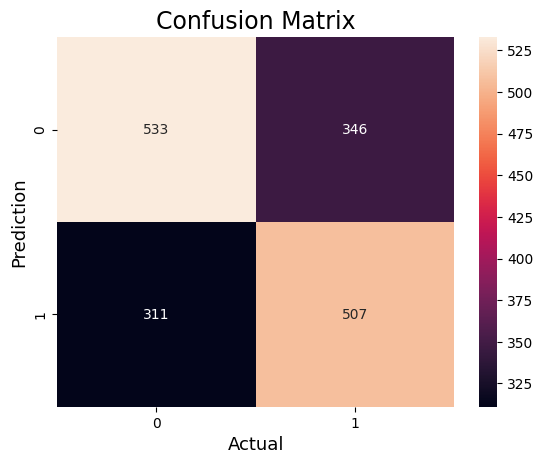

In [ ]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
lr.coef_

array([[ 0.19127414, -0.021232  , -0.06960662, -0.63293654, -0.02659884,
        -0.2259507 , -0.17482376,  0.35134302,  0.06922436,  0.        ,
         0.08941808, -0.11036641,  0.40515412, -0.10112935,  0.4177595 ,
         0.19004072, -0.044309  ,  0.04683813, -0.0282488 ,  0.01691441,
        -0.28043244,  0.05699779,  0.15994444,  0.00127247,  0.07599925,
        -0.039511  , -0.10317177, -0.1539125 , -0.24710611, -0.10694285,
        -0.15386726,  0.10055589, -0.05536672,  0.01256034]])

In [ ]:
lr_df = pd.DataFrame({"actual":y_test,"predicted":y_pred})
lr_df.head()

,actual,predicted
3948,1,1
5097,1,1
3689,1,0
1499,0,1
5217,1,1


<H1 align='center'>K-Nearest Neighbors (KNN)</H1>

Using cross validation to get best value for k

In [ ]:
k_values = [i for i in range (1,31)]
scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, x_res, y_res, cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

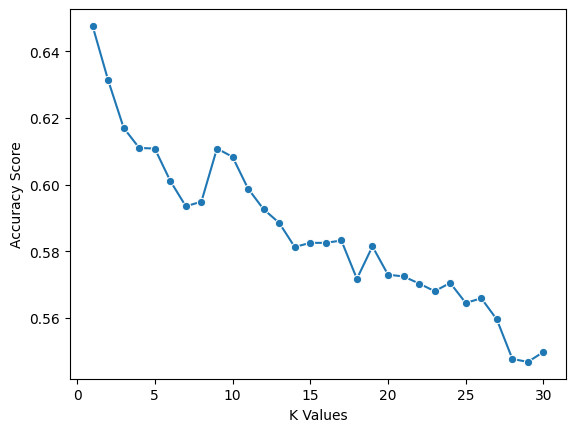

In [ ]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [ ]:
# Training model
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
y_pred = knn.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy  using KNN  on test Data  : {:.2f} %".format(np.round(accuracy,4)*100))
print("Percition using KNN  on test Data  : {:.2f} %".format(np.round(precision,4)*100))
print("Recall    using KNN  on test Data  : {:.2f} %".format(np.round(recall,4)*100))

Accuracy  using KNN  on test Data  : 91.34 %
Percition using KNN  on test Data  : 87.49 %
Recall    using KNN  on test Data  : 95.72 %


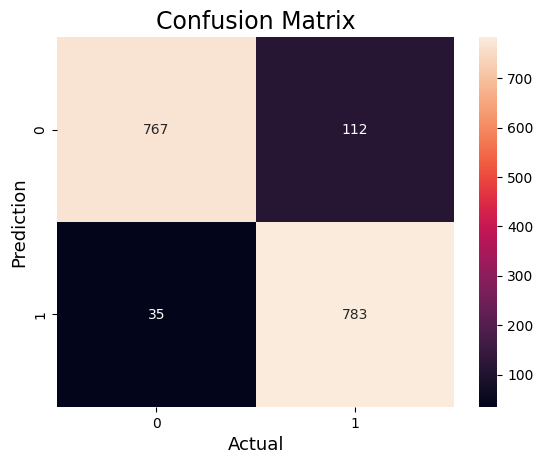

In [ ]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
knn_df = pd.DataFrame({"actual":y_test,"predicted":y_pred})
knn_df.head()

,actual,predicted
3948,1,1
5097,1,1
3689,1,1
1499,0,0
5217,1,1


<H1 align='center'>Decision Tree</H1>

In [ ]:
# Training Model

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy  using Decision Tree  on test Data  : {:.2f} %".format(np.round(accuracy,4)*100))
print("Percition using Decision Tree  on test Data  : {:.2f} %".format(np.round(precision,4)*100))
print("Recall    using Decision Tree  on test Data  : {:.2f} %".format(np.round(recall,4)*100))

print("Metrics Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy  using Decision Tree  on test Data  : 100.00 %
Percition using Decision Tree  on test Data  : 100.00 %
Recall    using Decision Tree  on test Data  : 100.00 %
Metrics Accuracy: 1.0


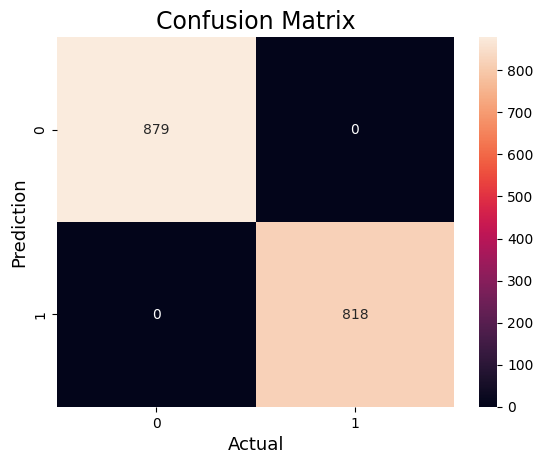

In [ ]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
dt_df = pd.DataFrame({"actual":y_test,"predicted":y_pred})
dt_df.head()

,actual,predicted
3948,1,1
5097,1,1
3689,1,1
1499,0,0
5217,1,1


<H1 align='center'>Random Forest</H1>

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(x_test)

print("Accuracy  using RF  on test Data  : {:.2f} %".format(np.round(accuracy,4)*100))
print("Percition using RF  on test Data  : {:.2f} %".format(np.round(precision,4)*100))
print("Recall    using RF  on test Data  : {:.2f} %".format(np.round(recall,4)*100))

Accuracy  using RF  on test Data  : 100.00 %
Percition using RF  on test Data  : 100.00 %
Recall    using RF  on test Data  : 100.00 %


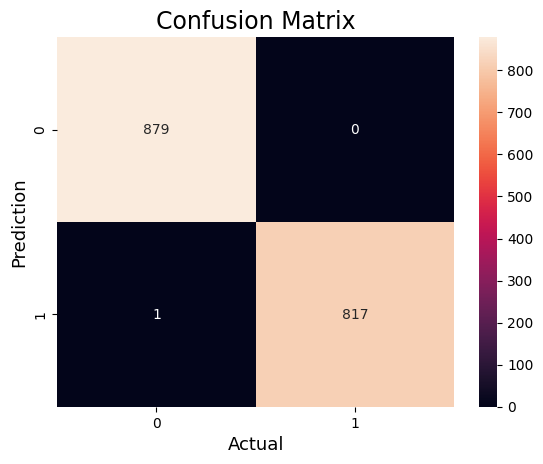

In [ ]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
rf_df = pd.DataFrame({"actual":y_test,"predicted":y_pred})
rf_df.head()

,actual,predicted
3948,1,1
5097,1,1
3689,1,1
1499,0,0
5217,1,1


<H1 align='center'>SVC</H1>

In [ ]:
clf = SVC()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

print(clf.score(x_test, y_test))
print("Accuracy  using RF  on test Data  : {:.2f} %".format(np.round(accuracy,4)*100))
print("Percition using RF  on test Data  : {:.2f} %".format(np.round(precision,4)*100))
print("Recall    using RF  on test Data  : {:.2f} %".format(np.round(recall,4)*100))

0.8432527990571597

Hyperparameter tunning using gridsearchcv to find best score

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'poly', 'sigmoid']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)


grid.fit(x_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.701 total time=   1.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.708 total time=   1.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.753 total time=   1.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.727 total time=   1.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.708 total time=   1.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.889 total time=   2.4s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.876 total time=   1.5s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.909 total time=   1.9s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.876 total time=   1.9s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.880 total time=   1.4s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.460 total time=   1.1s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=3)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.01)


In [ ]:
clf = SVC(kernel='rbf', gamma=0.01, C=1000)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
clf.score(x_test, y_test)

0.9911608721272834

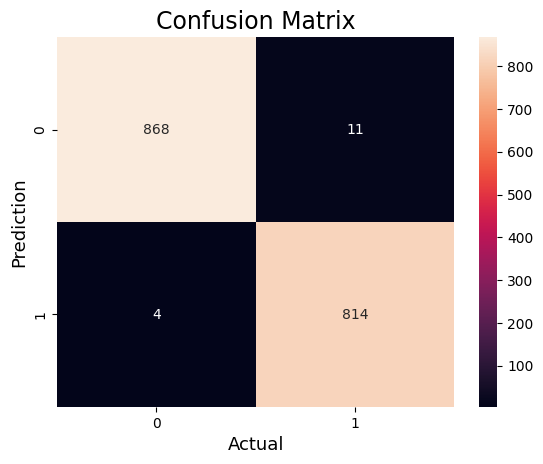

In [ ]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
print("Accuracy  using RF  on test Data  : {:.2f} %".format(np.round(accuracy,4)*100))
print("Percition using RF  on test Data  : {:.2f} %".format(np.round(precision,4)*100))
print("Recall    using RF  on test Data  : {:.2f} %".format(np.round(recall,4)*100))

Accuracy  using RF  on test Data  : 100.00 %
Percition using RF  on test Data  : 100.00 %
Recall    using RF  on test Data  : 100.00 %


<H1 align='center'>NOTE FOR VISUALIZATION</H1>

In [ ]:
# fig,ax = plt.subplots(1,2)
# # Plot 1
# splot = df_app['CODE_GENDER'].value_counts().plot.bar(ax=ax[0])
# for p in splot.patches:
#     splot.annotate(format(p.get_height(), ',.0f'), # Getting annotate into thousand using format pacifier ,.0f
#                     (p.get_x() + p.get_width() / 2., p.get_height()),
#                     ha = 'center',
#                     va = 'center',
#                     xytext = (0, 10),
#                     textcoords = 'offset points')
# ax[0].set_title('Count of Gender')
# ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=0) # Rotating xticks using axis
# # Set yticks
# ax[0].set_ylim([0, 350000]) # set ylim ticks
# sns.despine(right=True,top = True)

# plt.tight_layout()

# # Plot 2
# splot2 = df_app.groupby(['CODE_GENDER'])['AMT_INCOME_TOTAL'].mean().plot.bar(ax=ax[1], color='red')
# for p in splot2.patches:
#     splot2.annotate(format(p.get_height(), ',.0f'), # Getting annotate into thousand using format pacifier ,.0f
#                     (p.get_x() + p.get_width() / 2., p.get_height()),
#                     ha = 'center',
#                     va = 'center',
#                     xytext = (0, 10),
#                     textcoords = 'offset points')
# ax[1].set_title('Average Amt Income Total of Gender')
# ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation=0) # Rotating xticks using axis
# ax[1].set(xlabel=None)
# sns.despine(right=True,top = True)
# # Set yticks
# ax[1].set_ylim([0, 350000]) # set ylim ticks

# plt.tight_layout()
# plt.show()

In [ ]:
# # Memberikan anotasi PERCENTAGE

# for p in splot.patches:
#     splot.annotate(format(p.get_height()/df_app.shape[0], '.0%'),
#                     (p.get_x() + p.get_width() / 2., p.get_height()),
#                     ha = 'center',
#                     va = 'center',
#                     xytext = (0, 10),
#                     textcoords = 'offset points')

# # Setting Plot
# sns.despine(right=True,top = True, left = True)
# splot.axes.yaxis.set_visible(False)
# plt.tight_layout()
# plt.show()